In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

In [2]:
track_data = pd.read_csv("tracks_features.csv")


In [3]:
track_data = pd.read_csv("tracks_features.csv",usecols=["name","album","artists","danceability","energy","speechiness","acousticness",
                                                       "instrumentalness","liveness","valence","tempo", "duration_ms","time_signature","year"])


In [4]:
#track_data.head()

In [5]:
track_data.dropna(inplace=True)


In [6]:
track_data_sample = track_data.sample(frac=0.01, random_state=42)

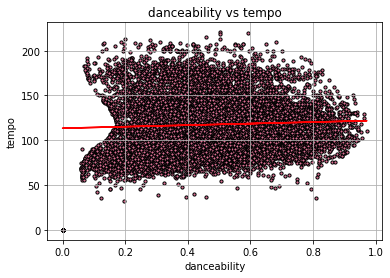

In [7]:
fig, ax= plt.subplots(1,1)
ax.scatter(track_data_sample["danceability"],track_data_sample["tempo"],edgecolor="black",color="#DB7093",s=10)

ax.set(xlabel="danceability",
      ylabel="tempo",
      title="danceability vs tempo")
ax.grid()
x=track_data_sample["danceability"]
y=track_data_sample["tempo"]
corr= st.pearsonr(x,y )
(slope, intercept,rvalue,pvalue,stderr)=st.linregress(x,y)
regress = x * slope + intercept
plt.plot(x, regress, "r-")

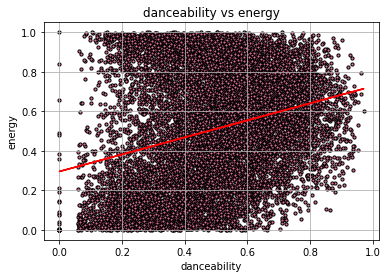

In [8]:
fig, ax= plt.subplots(1,1)
ax.scatter(track_data_sample["danceability"],track_data_sample["energy"],edgecolor="black",color="#DB7093",s=10)

ax.set(xlabel="danceability",
      ylabel="energy",
      title="danceability vs energy")
ax.grid()
x=track_data_sample["danceability"]
y=track_data_sample["energy"]
corr= st.pearsonr(x,y)
(slope, intercept,rvalue,pvalue,stderr)=st.linregress(x,y)
regress = x * slope + intercept
plt.plot(x, regress, "r-")

In [9]:

track_data_sample["year"].min()

1917

In [10]:
track_data_sample["year"].max()
track_data_sample.dtypes
track_data_sample["year"].astype(int)

54449     2006
127106    2008
11213     1991
369031    2013
544989    2013
          ... 
55687     2019
367635    1970
929670    2009
483437    2015
165515    2008
Name: year, Length: 12040, dtype: int32

In [11]:
#establish bins for danceability
bins = [0.7, 0.79999, 0.89999, 0.9999]
group_labels= ["0.7 to 0.7999", "0.8000 to 0.89999" ,"0.9000 to 1.0"]
# Convert the "danceability" column to numeric
track_data_sample["danceability"] = pd.to_numeric(track_data_sample["danceability"], errors='coerce')
#drop NaN
track_data_sample = track_data_sample.dropna(subset=["year"])


In [12]:
pd.cut(track_data_sample["danceability"],bins,labels=group_labels).head()
track_data_sample["bins"]=pd.cut(track_data_sample["danceability"],bins,labels=group_labels)



In [13]:
# Establish bin for years
year_bins = [1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]
group_label_y=["before 1920","1920 to 1930","1930 to 1940"," 1940 to 1950","1950 to 1960","1960 to 1970","1970 to 1980",
             "1980 to 1990","1990 to 2000","2000 to 2010","2010 to 2020"]  
# Convert the "year" column to numeric
track_data_sample["year"] = pd.to_numeric(track_data_sample["year"], errors='coerce')
# Drop rows with missing year values
track_data_sample = track_data_sample.dropna(subset=["year"])

In [14]:
track_data_sample["year"]=pd.cut(track_data_sample["year"],year_bins, labels=group_label_y,include_lowest=True)


In [34]:
#mean = track_data_sample["danceability"].groupby(track_data_sample["year"]).mean()
#median = track_data_sample["danceability"].groupby(track_data_sample["year"]).median()
#var = track_data_sample["danceability"].groupby(track_data_sample["year"]).std()
#sem = track_data_sample["danceability"].groupby(track_data_sample["year"]).sem()

#summary_stat = pd.DataFrame({"Mean Danceability Volume":mean,
                             #"Median Danceability Volume":median,
                             #"Danceability Variance":var,
                             #"Danceability Std. Dev": std,
                             #"Danceability Std. Err.": sem})




summary=track_data_sample.groupby(["year"])[["danceability"]].agg(["mean","median","var","std","sem"])
summary


danceability                                      
                      mean  median       var       std       sem
year                                                            
before 1920       0.174000  0.1740       NaN       NaN       NaN
1920 to 1930      0.496667  0.4160  0.071444  0.267291  0.154320
1930 to 1940      0.548250  0.5475  0.017811  0.133458  0.066729
 1940 to 1950     0.405545  0.3880  0.018052  0.134359  0.040511
1950 to 1960      0.418590  0.4190  0.023911  0.154633  0.024761
1960 to 1970      0.446300  0.4575  0.023663  0.153828  0.016215
1970 to 1980      0.475203  0.4940  0.026879  0.163949  0.013085
1980 to 1990      0.471778  0.4790  0.036427  0.190858  0.010290
1990 to 2000      0.466558  0.4675  0.036695  0.191559  0.004500
2000 to 2010      0.486622  0.4920  0.034623  0.186072  0.002794
2010 to 2020      0.503899  0.5130  0.036584  0.191269  0.002667

In [35]:
#group=pd.DataFrame(track_data_sample.groupby(["year"]))
summary.columns=["mean","median","var","std","sem"]

summary

,mean,median,var,std,sem
year,,,,,
before 1920,0.174000,0.1740,NaN,NaN,NaN
1920 to 1930,0.496667,0.4160,0.071444,0.267291,0.154320
1930 to 1940,0.548250,0.5475,0.017811,0.133458,0.066729
1940 to 1950,0.405545,0.3880,0.018052,0.134359,0.040511
1950 to 1960,0.418590,0.4190,0.023911,0.154633,0.024761
1960 to 1970,0.446300,0.4575,0.023663,0.153828,0.016215
1970 to 1980,0.475203,0.4940,0.026879,0.163949,0.013085
1980 to 1990,0.471778,0.4790,0.036427,0.190858,0.010290
1990 to 2000,0.466558,0.4675,0.036695,0.191559,0.004500


Text(0.5, 1.0, 'Average Danceability by Decade')

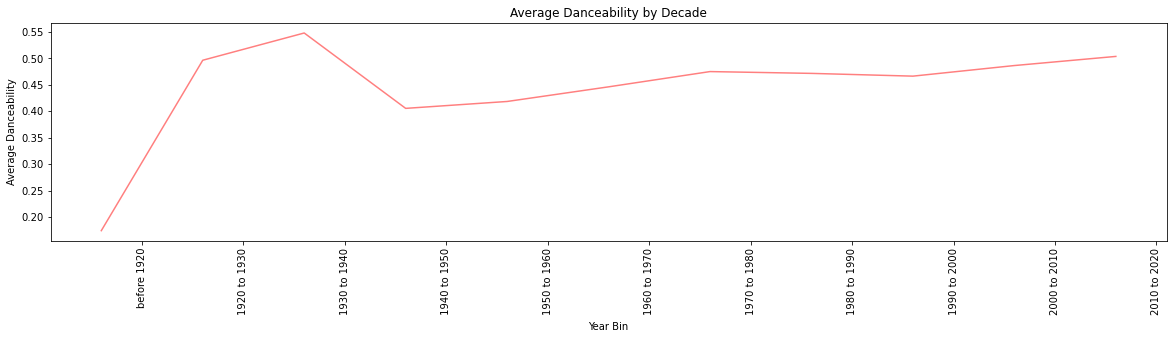

In [38]:
x_axis=np.arange(len(summary))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,4))
plt.plot(x_axis, summary["mean"], color='r', alpha=0.5)
plt.xticks(tick_locations,summary.index,rotation="vertical")

# Add labels and title
plt.xlabel('Year Bin')
plt.ylabel('Average Danceability')
plt.title('Average Danceability by Decade')

SyntaxError: can't assign to operator (1231405995.py, line 5)